# Conventional Autoencoder
This notebook will present to the user how a conventional autoencoder can be generated, trained and its performance tested. Moreover, it will be discussed how to load an already saved trained AE in case there is not enough time to prepare an entire new model.

The first step is to call the ClassAE class in order to have available all type of functions that could be needed while working with the AE

In [2]:
from FlowCompression.ClassAE import AE

In order to train the autoencoder, a data set is required. This can be loaded using the built-in function 'preprocess' from ClassAE. This method loads a certain data set based on the Reynolds Number and the dimensions requested by the user. Once that is done it splits the entire time series into a train, validation and test data set. It is very important to split in three parts in order to perform a fair tuning. The way the function has been implemented leads 75% of the time series to be the train set, 20% to be the validation set and 5% to be used as test set. When calling the function, the user can set other two parameters to True or False: split, which determines if the time series should be divided as presented above or if kept as it is, and norm, which if set to True performs the normalization of the velocity fields. Before getting into the code, it is important to remind the default parameters of the function:
- u_all = None (in case a time series has already been loaded)
- re = 40.0 (Reynolds number)
- nx = 24 (x and y dimensions of a frame)
- nu = 2 (dimension of the velocity vector)
- split = True
- norm = True

Here below the call to create the three data set is presented:

In [3]:
u_train, u_val, u_test = AE.preprocess()

Now the autoencoder can be created and some of its attributes can be initialised. This is important since those are used in most of the built-in methods. For the class AE, multiple parameters are present and these are explained below with their default values:
- dimensions: dimensions of the layers of the NN -> [32,16,8,4]
- l_rate: learning rate -> 0.0005
- epochs: number of epochs -> 200
- batch: batch size -> 10
- early_stopping: number of steps with same loss before stopping training -> 10
- re: Reynolds number -> 40.0
- nx: x and y dimension of one frame -> 24
- nu: dimension of the velocity vector -> 2
- activation_function: activation function for the convolutional NN layers -> 'tanh'
- pooling: type of pooling in NN layers -> 'max'
- loss: loss function used for training NN -> 'mse'
- train_array: training array -> None
- val_array: validation array -> None
- hierarchical: bool to determine if a hierarchical AE or conventional AE has to be generated -> False

In [5]:
model = AE()
model.u_train, model.u_val, model.u_test = u_train, u_val, u_test

The newly generated model is trained. This means that both the encoder, decoder and autoencoder are trained at the same time:

In [10]:
model.fit(u_train, u_val)

Epoch 1/200
300/300 [==============================] - 5s 12ms/step - loss: 0.0344 - val_loss: 0.0158
Epoch 2/200
300/300 [==============================] - 4s 12ms/step - loss: 0.0122 - val_loss: 0.0088
Epoch 3/200
300/300 [==============================] - 4s 13ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 4/200
300/300 [==============================] - 7s 22ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 5/200
300/300 [==============================] - 5s 18ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 6/200
300/300 [==============================] - 4s 14ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 7/200
300/300 [==============================] - 5s 18ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/200
300/300 [==============================] - 4s 15ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 9/200
300/300 [==============================] - 5s 16ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 10/200
300/300 [==============================] - 5s 16ms/step - loss: 0.004

The predictions of the autoencoder can be tested using the u_test data set and the function passthrough. This last one decodes the test set with the trained encoder and then inputs the generated latent spaces into the decoder to finally predict the magnitudes of the reconstructed flow field. Once the predictions are made, the reconstructed frames and the original frames can also be plotted:

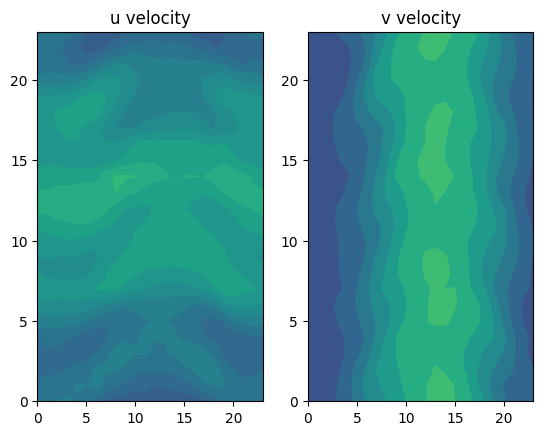

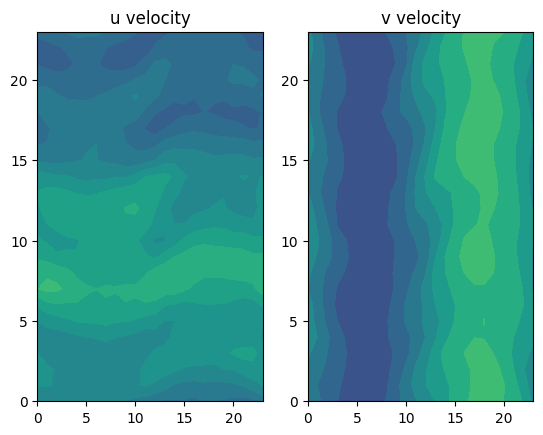

In [12]:
reconstructed = model.passthrough(u_test)
AE.u_v_plot(reconstructed[0])
AE.u_v_plot(reconstructed[1])

Another important step in generating the AE model is to check its performance. This means looking at the accuracy with how the autoencoder reconstructs the flow field. Two values are reported:
- Absolute percentage: the percentage of the absolute difference in magnitude between the reconstructed and original flow
- Squared percentage: the percentage of the squared difference in magnitude between the reconstructed and the original flow

In [16]:
performance = model.performance()
print(f'Absolute %: {round(performance["abs_percentage"], 3)} +- {round(performance["abs_std"], 3)}')
print(f'Squared %: {round(performance["sqr_percentage"], 3)} +- {round(performance["sqr_std"], 3)}')

Absolute %: 91.752 +- 5.23799991607666
Squared %: 99.306 +- 1.0880000591278076


Finally, the last step would be to check if the reconstructed flows are physical by looking at their average divergence. The used method calculates the total divergence along each frame and then returns the maximum, minimum and average value throughout the time series. In order for a flow to be physical, the sum of the divergences has to be zero for each of the reconstructed frames. Though, outliers are present, therefore, until the values are close to zero, the flows can be assumed to respect the law of mass conservation.

In [17]:
model.verification(u_test)

max: 0.3381669521331787
min: -2.0029296875
avg: -0.36916595697402954


(0.33816695, -2.0029297, -0.36916596)

Now that the user knows how to create an autoencoder, how to load an already saved model will be discussed. In this case, the only difference comes from the creation of the model. In fact, AE() and AE.fit() do not have to be called again but the built-in function AE.create_trained() can be used. This method accepts only one parameter that can be an integer between 1 and 3. Each number connects to a different model:
- 1: Physical Autoencoder
- 2: Hierarchical Autoencoder
- 3: Intermediate Tuned Autoencoder

In [18]:
model = AE.create_trained(1)

Once this is completed, all the steps presented above (from attribute initialization) can be performed in the same way.